In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

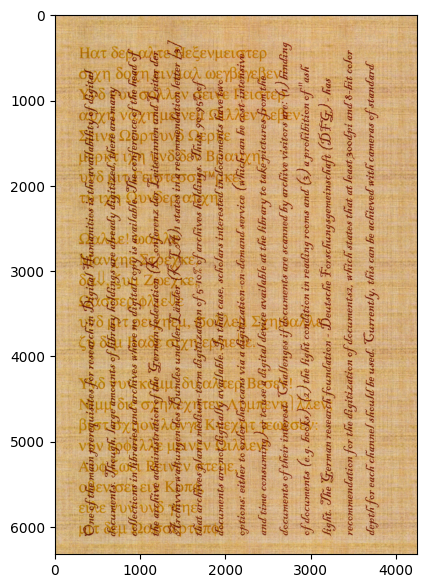

In [3]:
image = cv2.imread('./palimpsest-2024.jpg')

plt.figure(figsize=(15, 7))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
blue_channel, green_channel, red_channel = cv2.split(image)

In [11]:
matrices = [blue_channel, green_channel, red_channel]
max_diff = 0
max_indices = (0, 0)

# Iterate over all combinations of pairs of matrices
for i in range(len(matrices)):
    for j in range(i+1, len(matrices)):
        # Calculate the absolute difference between the two matrices
        diff = np.sum(np.abs(matrices[i] - matrices[j]))
        # Update max_diff and max_indices if the current difference is greater
        if diff > max_diff:
            max_diff = diff
            max_indices = (i, j)

# Extract the matrices with the highest difference
matrix_with_max_diff1 = matrices[max_indices[0]]
matrix_with_max_diff2 = matrices[max_indices[1]]

print("Matrices with the highest difference:")
print(matrix_with_max_diff1)
print(matrix_with_max_diff2)

Matrices with the highest difference:
[[195 194 191 ... 162 166 166]
 [187 188 193 ... 166 166 166]
 [188 187 190 ... 166 165 165]
 ...
 [168 170 171 ... 177 178 177]
 [171 171 174 ... 180 180 180]
 [175 175 177 ... 179 179 179]]
[[227 226 223 ... 198 202 202]
 [219 220 225 ... 202 202 202]
 [219 218 222 ... 202 202 202]
 ...
 [208 207 208 ... 213 216 214]
 [208 206 209 ... 216 216 216]
 [210 210 212 ... 216 215 215]]


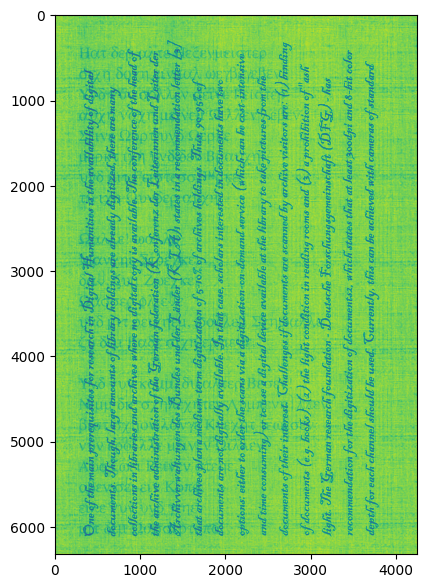

In [17]:
plt.figure(figsize=(15, 7))
plt.imshow(red_channel)
plt.show()

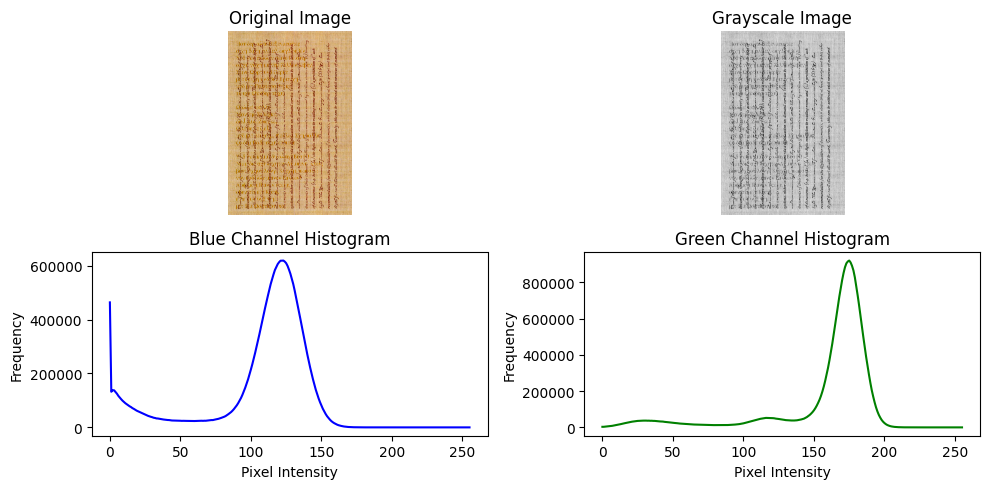

In [18]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate histograms for each channel
hist_blue = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_green = cv2.calcHist([image], [1], None, [256], [0, 256])
hist_red = cv2.calcHist([image], [2], None, [256], [0, 256])

# Plot histograms
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.plot(hist_blue, color='blue')
plt.title('Blue Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.plot(hist_green, color='green')
plt.title('Green Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()